# Assignment 1: Cryosphere Data Science Crash Course

---

### Learning outcomes
#### 1. Gain a first exposure to coding.

Learn how to run basic Python code (algeraic operations ```+```, ```-```, ```*```, ```/```, variables ```x=1```) in a Jupyter notebook
    
#### 2.  Use a ```function``` to calculate latent heat of fusion. 
Recall from lecture that the latent heat of fusion of ice is important in the Earth and Space Sciences  because it explains why ice stays around for so long into the Spring and Summer: it actually takes a lot of energy to melt water ice!  [Link to Wikipedia table of other materials](https://en.wikipedia.org/wiki/Latent_heat#Table_of_specific_latent_heats).  If we had solid nitrogen glaciers (like on Pluto; it would have to be a lot colder), these glaciers would have a very different behavior in the environment because solid nitrogen has a latent heat of fusion that is more than 10x smaller than water ice.

    
#### 3. Learn about historical records of lake ice

a. Run code that downloads a dataset and loads it into a Jupyter Notebook

b. Use ```pandas``` to look at a dataset of historical lake ice records

---
### Instructions

1. Please read every line of this notebook.  
2. Instructions that require you to do something are written in **bold.**
3. Answer the questions in Assignment 1 (on Canvas)

# Part 1: Gain a first exposure to coding

In [30]:
# This block of coode is called a cell. 
# This line of code doesn't execute because its a comment -- denoted by the "#" at the beginning of the line.

**Try typing ```1+1``` below and then hold Shift and press Enter:**

If you want to do fancier math, you'll need to "import" the functions, like this:

In [23]:
from numpy import sin, sqrt, pi

sin(pi/4)


0.7071067811865476

**Try some other imports in the cell below:**

Variables in pythons are assigned by writing, for example ```a = 1```. **Execute the following code to see an example.**  Notice also how we use the ```print``` command.

In [31]:
x = 3
y = 2

u = x + y
print(u)

v = x * y
print(v)

5
6


**In the cell below, write your own expressions using variables and the ```print``` command**

# Part 2: Using functions
Just like in math, a function z = f(x,y) has inputs and outputs.  In Python, functions have the syntax,

```
def function_name (input1, intput2, input 3):
    # do something
    return output
```
    
Here, we're going to work with a function called latent_heat_calculator. 

**Run the following cell to load the function into memory.**

In [13]:
def latent_heat_calculator(ci=2.090, #kJ/kg/degC
            cw=4.186, # Specific heat of liquid water, kJ/kg/degC
            mi=50,    # Mass of ice, g
            mw=200,   # Mass of water, g
            Tw0=0,    # Initial water temperature, deg C
            Twf=0,    # Final water temperature, deg C
            Tim=0,    # Water melting point, deg C
            Ti0=-20,  # Initial temperature of ice
            K_calorimeter=0, # Calibration constant of the calorimeter.  For our styrofoam container,
                                 # we can approximate this as zero, (kJ/degC)
            verbose=False):
    Q_warming_the_water = cw*mw*(Tw0-Twf) /1e3 
    if verbose: print(f'Energy to cool down initial water mass: Qswi = {Q_warming_the_water:.2f} kJ')

    Q_heat_former_ice = cw*mi*(Twf - Tim) /1e3
    if verbose: print(f'Specific heating of initial ice mass once it is liquid: {Q_heat_former_ice/1e3:.2f} kJ')

    Qambient = K_calorimeter*(Tw0 - Twf)
    if verbose: print(f'Heat lost to the environment: {Qambient:.4f} kJ')

    Q_warm_the_ice = ci*mi*(Ti0-Tim)/1e3
    if verbose: print(f'Specific heating of ice to the melting point: {Q_warm_the_ice/1e3:.2f} kJ')

    Lf_exp = (Q_warming_the_water - Qambient - Q_heat_former_ice - Q_warm_the_ice)/mi
#     Lf_exp = (Q_warming_the_water - Q_heat_former_ice)/mi
    
    return Lf_exp

**Run the following calculation to test**

In [30]:
Lf = latent_heat_calculator( Tw0 = 20,    # Initial water temperature
                             Twf = 3.10,  # Final water temperature
                             Ti0 = -20,   # Initial ice temperature
                             mi = 50,     # Mass of ice
                             mw = 200,    # Mass of water
                             verbose=True # Print out message about the calculation
                      )
print('============================')
print(f'Latent Heat of Fusion = {Lf} kJ/kg') # Notice how this syntax lets us combine variables and text

Energy to cool down initial water mass: Qswi = 14.15 kJ
Specific heating of initial ice mass once it is liquid: 0.00 kJ
Heat lost to the environment: 0.0000 kJ
Specific heating of ice to the melting point: -0.00 kJ
Latent Heat of Fusion = 0.311797 kJ/kg


# Part 3: Analyzing a dataset about frozen lakes

In [32]:
import pandas as pd
import geopandas as gpd
import numpy as np

url_1="ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G01377/liag_freeze_thaw_table.csv"
df1=pd.read_csv(url_1)
df1 = df1[df1.longitude>-999]
free_thaw_table = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.longitude, df1.latitude))


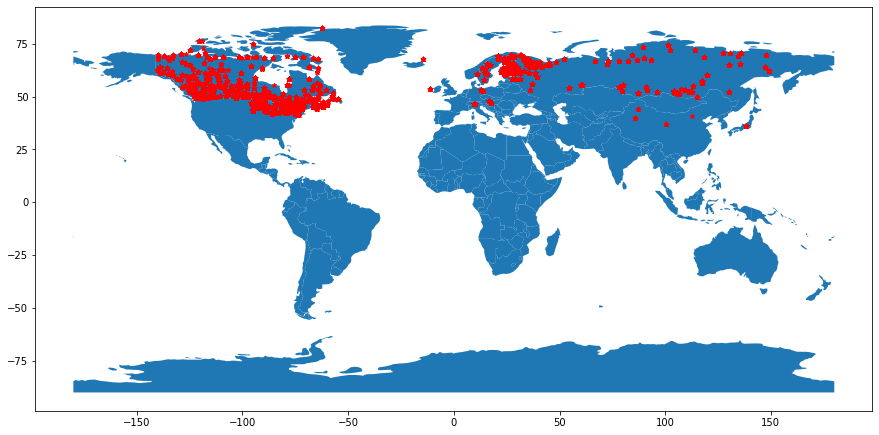

In [39]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (15,15))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax)
free_thaw_table = free_thaw_table[free_thaw_table.iceon_year > 0]
free_thaw_table.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi')
plt.show()

How many obserations are in this dataset? To answer this question we can use the built-in function ```len```. **Run the following line of code.**

In [40]:
len(free_thaw_table)

24260

(0.0, 20.0)

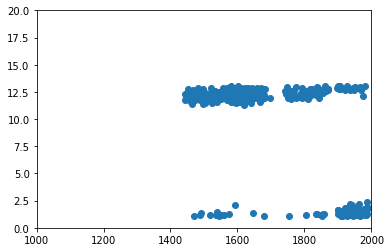

In [36]:
year = free_thaw_table[free_thaw_table.lakename=='LAKE SUWA'].iceon_year
day = free_thaw_table[free_thaw_table.lakename=='LAKE SUWA'].iceon_month + \
        free_thaw_table[free_thaw_table.lakename=='LAKE SUWA'].iceon_day/30

plt.plot(year,day,'o')
plt.xlim([1000,2000])
plt.ylim(0,20)

NameError: name 'iceon_year' is not defined